##### OpenCV 辨識不同人臉
這篇教學會介紹使用 OpenCV 內建的 LBPH 人臉訓練功能 ( cv2.face.LBPHFaceRecognizer_create())，搭配人臉特徵模型，\
訓練判斷不同人臉的模型檔案，完成後就能透過攝影機的影像，辨識出不同的人臉，標記出對應的名字。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 安裝 opencv_contrib_python 
要使用 cv2.face.LBPHFaceRecognizer_create()，必須先安裝 opencv_contrib_python，輸入下列指令進行安裝，\
opencv_contrib_python 提供 opencv 更多的操作方法。

如果使用 Anaconda Jupyter 搭配命令提示字元或終端機安裝，雖然可以順利安裝，\
但程式執行後可能會出現「module 'cv2' has no attribute 'face'」提示，\
有兩種解決方法：
* 第一、改成在 Jupyter 裡使用 !pip 直接安裝。
* 第二，移除 opencv-python 和 opencv_contrib_python，再次重新安裝。
* pip install opencv_contrib_python

##### 使用人臉圖片，訓練模型 
如果要辨識不同的人臉，必須先「訓練」不同人臉的模型，透過 cv2.face.LBPHFaceRecognizer_create() 方法，\
將收集好的人臉圖片 ( 同樣的人，不同角度的照片 20～30 張 )，以每個 id 為一個人的單位進行影像訓練，保留相關特徵值，\
屆時只要比對特徵值，就能得到人臉辨識的信心指數。

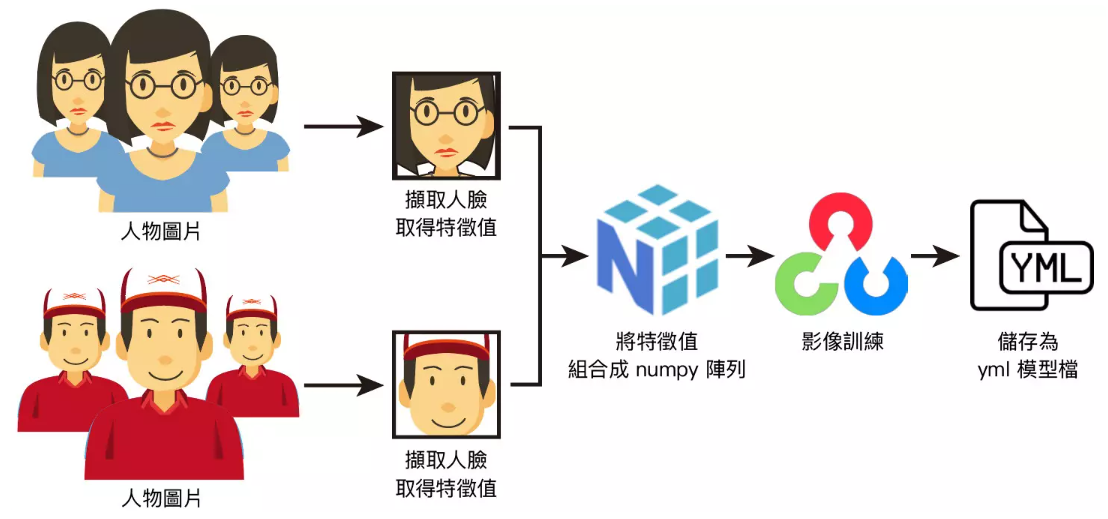

首先準備一些蔡英文的照片和川普的照片 ( 都是使用 Goolge 圖片搜尋取得 )

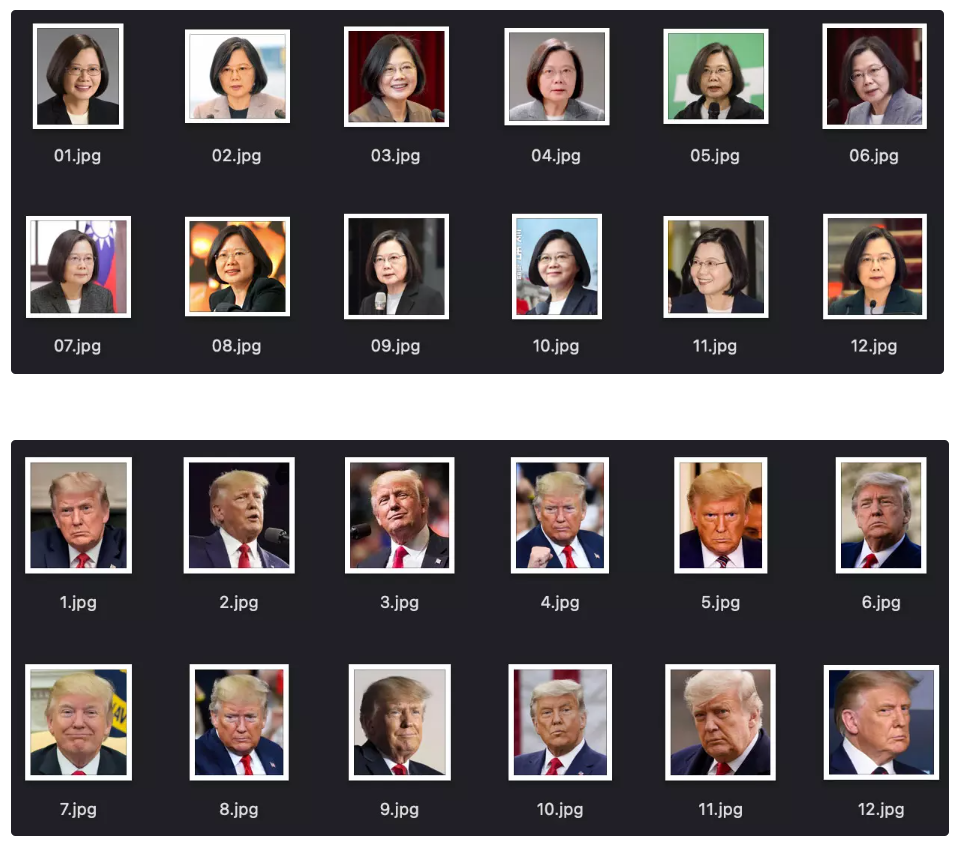

接著撰寫下方的程式，除了訓練蔡英文和川普的照片，也搭配一組使用攝影鏡頭記錄自己的人臉影像，經過訓練後產生 yml 模型檔案儲存。

In [4]:
import os
import cv2
import numpy as np

# 載入人臉追蹤模型
detector = cv2.CascadeClassifier(r"D:\Learning_Python\Python AI Image recognition\Model\2\haarcascade_frontalface_default.xml")

# 啟用訓練人臉模型方法
recog = cv2.face.LBPHFaceRecognizer_create()

# 儲存人臉位置大小的串列
faces = []

# 記錄該人臉 id 的串列
ids = []

# 定義縮放大小
target_size = (640, 640)

# 定義圖像目錄
lee_dahye_dir = r'D:\Learning_Python\Python AI Image recognition\Img\Face\Lee_Da_hye'
trump_dir = r'D:\Learning_Python\Python AI Image recognition\Img\Face\TRUMP'

# 獲取目錄中的所有文件
lee_dahye_files = [f for f in os.listdir(lee_dahye_dir) if os.path.isfile(os.path.join(lee_dahye_dir, f))]
trump_files = [f for f in os.listdir(trump_dir) if os.path.isfile(os.path.join(trump_dir, f))]

# 第一個訓練數據集
for i in range(len(lee_dahye_files)):
    img_path = os.path.join(lee_dahye_dir, lee_dahye_files[i])
    img = cv2.imread(img_path)  # 依序開啟每一張李多慧的照片
    if img is None:
        print(f"Error: Image at path {img_path} could not be loaded.")
        continue
    img = cv2.resize(img, target_size)  # 將圖像縮放到 640x640
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 色彩轉換成黑白
    img_np = np.array(gray, 'uint8')  # 轉換成指定編碼的 numpy 陣列
    face = detector.detectMultiScale(gray)  # 擷取人臉區域
    for (x, y, w, h) in face:
        faces.append(img_np[y:y + h, x:x + w])  # 記錄李多海人臉的位置和大小內像素的數值
        ids.append(1)  # 記錄李多慧人臉對應的 id，只能是整數，都是 1 表示李多海的 id 為 1

# 第二個訓練數據集
for i in range(len(trump_files)):
    img_path = os.path.join(trump_dir, trump_files[i])
    img = cv2.imread(img_path)  # 依序開啟每一張川普的照片
    if img is None:
        print(f"Error: Image at path {img_path} could not be loaded.")
        continue
    img = cv2.resize(img, target_size)  # 將圖像縮放到 640x640
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 色彩轉換成黑白
    img_np = np.array(gray, 'uint8')  # 轉換成指定編碼的 numpy 陣列
    face = detector.detectMultiScale(gray)  # 擷取人臉區域
    for (x, y, w, h) in face:
        faces.append(img_np[y:y + h, x:x + w])  # 記錄川普人臉的位置和大小內像素的數值
        ids.append(2)  # 記錄川普人臉對應的 id，只能是整數，都是 2 表示川普的 id 為 2

print('training...')  # 提示開始訓練
recog.train(faces, np.array(ids))  # 開始訓練
recog.save(r'D:\Learning_Python\Python AI Image recognition\Model\6\face.yml')  # 訓練完成儲存為 face.yml
print('ok!')

training...
ok!


##### 根據模型，辨識不同人臉 
已經訓練好 yml 模型檔後，就可以開始進行辨識，當辨識到人臉，會回傳 id 與該 id 的信心指數 confidence，信心指數數值越小表示越準確，\
藉由 id 與信心指數就能判斷出現在畫面中的人臉，並進一步標記對應的名字，下方的程式碼會標記出蔡英文、川普以及 oxxostudio 三個人臉，\
如果辨識的人臉不屬於這三個人，則會標記 ??? 的文字。

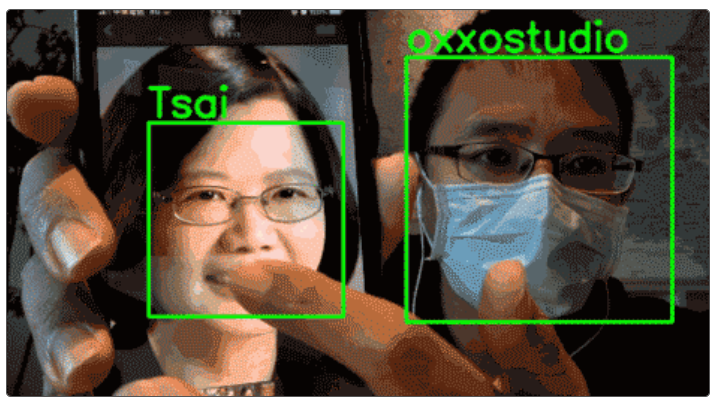

In [3]:
import cv2

# 啟用訓練人臉模型方法
recognizer = cv2.face.LBPHFaceRecognizer_create()

# 讀取人臉模型檔
recognizer.read(r'Model/6/face.yml')

# 載入人臉追蹤模型
cascade_path = r"Model/2/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

# 開啟攝影機
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # 讀取影像
    ret, img = cap.read()
    if not ret:
        print("Cannot receive frame")
        break

    # 縮小尺寸，加快辨識效率
    img = cv2.resize(img, (540, 300))

    # 轉換成灰階影像
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 偵測人臉，返回人臉的矩形框 (x, y, w, h)
    faces = face_cascade.detectMultiScale(gray)

    # 建立姓名和 id 的對照表
    name = {
        '1': 'Lee_Da_hye',
        '2': 'Trump',
        '3': 'ZM'
    }

    # 依序判斷每張臉屬於哪個 id
    for (x, y, w, h) in faces:
        # 標記人臉外框
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # 取出 id 號碼以及信心指數 confidence
        idnum, confidence = recognizer.predict(gray[y:y + h, x:x + w])

        # 如果信心指數小於 20，取得對應的名字
        if confidence < 20:
            text = name.get(str(idnum), '???')
        else:
            text = '???'

        # 在人臉外框旁加上名字
        cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # 顯示影像
    cv2.imshow('oxxostudio', img)

    # 按下 'q' 鍵退出
    if cv2.waitKey(5) == ord('q'):
        break

# 釋放攝影機並關閉所有視窗
cap.release()
cv2.destroyAllWindows()